In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#LOAD DATA
(x_train,y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=x_train/255
x_test=x_test/255
print("shape of traning :",x_train.shape)
print("shape of testing :",x_test.shape)

shape of traning : (60000, 28, 28)
shape of testing : (10000, 28, 28)


In [ ]:
from keras.src.backend import dropout
# model architecture
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_1 (Dense)             (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                      

In [ ]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=2)

Epoch 1/3
1875/1875 [==============================] - 41s 21ms/step - loss: 0.5270 - accuracy: 0.8497
Epoch 2/3
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2331 - accuracy: 0.9313
Epoch 3/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1790 - accuracy: 0.9472


In [ ]:
#estimating model prefromance
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.1266 - accuracy: 0.9624
loss=0.127
Accuracy=0.962


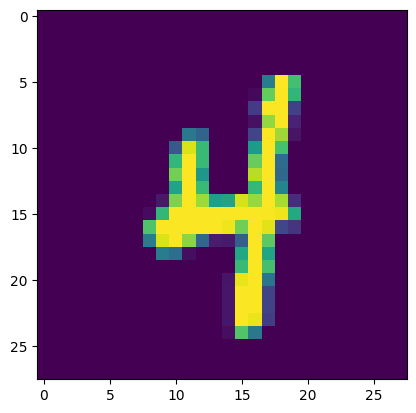

1875/1875 [==============================] - 15s 8ms/step
Handwritten number in the image is= 4


In [ ]:
import random
n=random.randint(0,9999)
plt.imshow(x_train[n])
plt.show()
predicted_value=model.predict(x_train)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

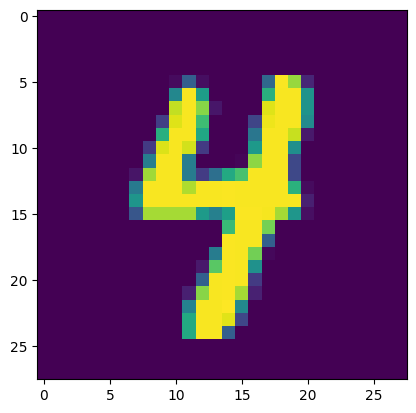

313/313 [==============================] - 3s 10ms/step
Handwritten number in the image is= 4


In [ ]:
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))